<a href="https://colab.research.google.com/github/GENNYB7/LinearRegressionBostonHousing/blob/main/Copy_of_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Coding_Dojo/PandasForDataManipulation/modifiedBostonHousing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
# getting the columns requested in the task
df = df.loc[:, ['RM', 'LSTAT', 'PTRATIO', 'price']]
df.head()

,RM,LSTAT,PTRATIO,price
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2


In [ ]:
# Look at the shape of the dataframe
df.shape

(506, 4)

In [ ]:
# There are missing values in the y column which is what we will predict 
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
price      1
dtype: int64

In [ ]:
# Remove entire rows from dataframe if they contain any nans in them or 'all'
# this may not be the best strategy for our dataset
df = df.dropna(how = 'any')

In [ ]:
# There are no more missing values
df.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
price      0
dtype: int64

In [ ]:
df.shape

(505, 4)

CORRELATION

In [ ]:
df.corr

<bound method DataFrame.corr of         RM  LSTAT  PTRATIO  price
0    6.575   4.98     15.3   24.0
1    6.421   9.14     17.8   21.6
2    7.185   4.03     17.8   34.7
3    6.998   2.94     18.7   33.4
4    7.147   5.33     18.7   36.2
..     ...    ...      ...    ...
501  6.593   9.67     21.0   22.4
502  6.120   9.08     21.0   20.6
503  6.976   5.64     21.0   23.9
504  6.794   6.48     21.0   22.0
505  6.030   7.88     21.0   11.9

[505 rows x 4 columns]>

In [ ]:
df.corr().sort_values(by = ['price'])

,RM,LSTAT,PTRATIO,price
PTRATIO,-0.356013,0.372996,1.000000,-0.187262
LSTAT,-0.614889,1.000000,0.372996,-0.027292
RM,1.000000,-0.614889,-0.356013,0.143347
price,0.143347,-0.027292,-0.187262,1.000000


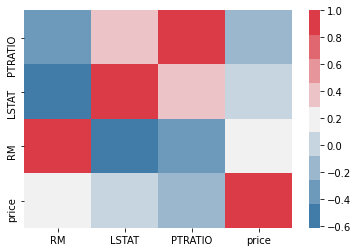

In [ ]:
# You can use a heat map to make it easier (in theory) to read the correlation matrix.
sns.heatmap(df.corr().sort_values(by = ['price']), cmap = sns.diverging_palette(240, 10, n=9))

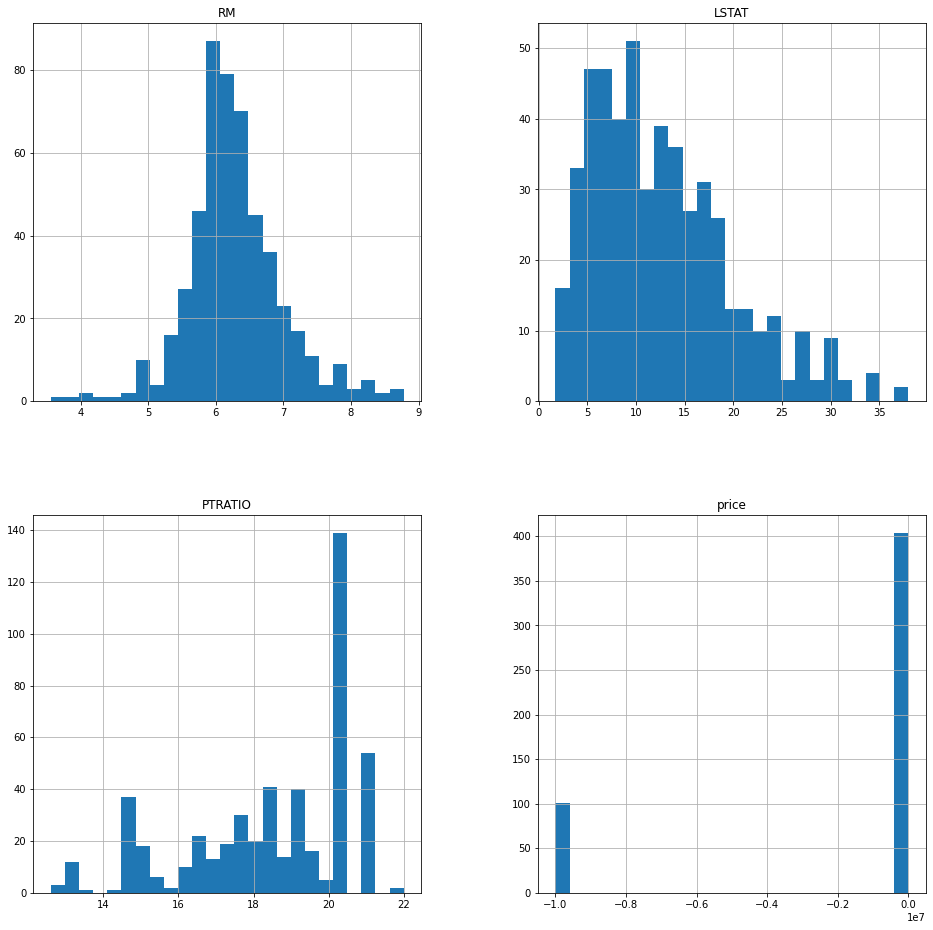

In [ ]:
#create histograms  - still just following lesson
#df.loc calling all rows and columns
df.loc[:,:].hist(bins=25,                       
                 figsize=(16,16));

In [ ]:
#remove negative prices
priceFilter = df.loc[:, 'price'] < 0
df = df.loc[~priceFilter, :]

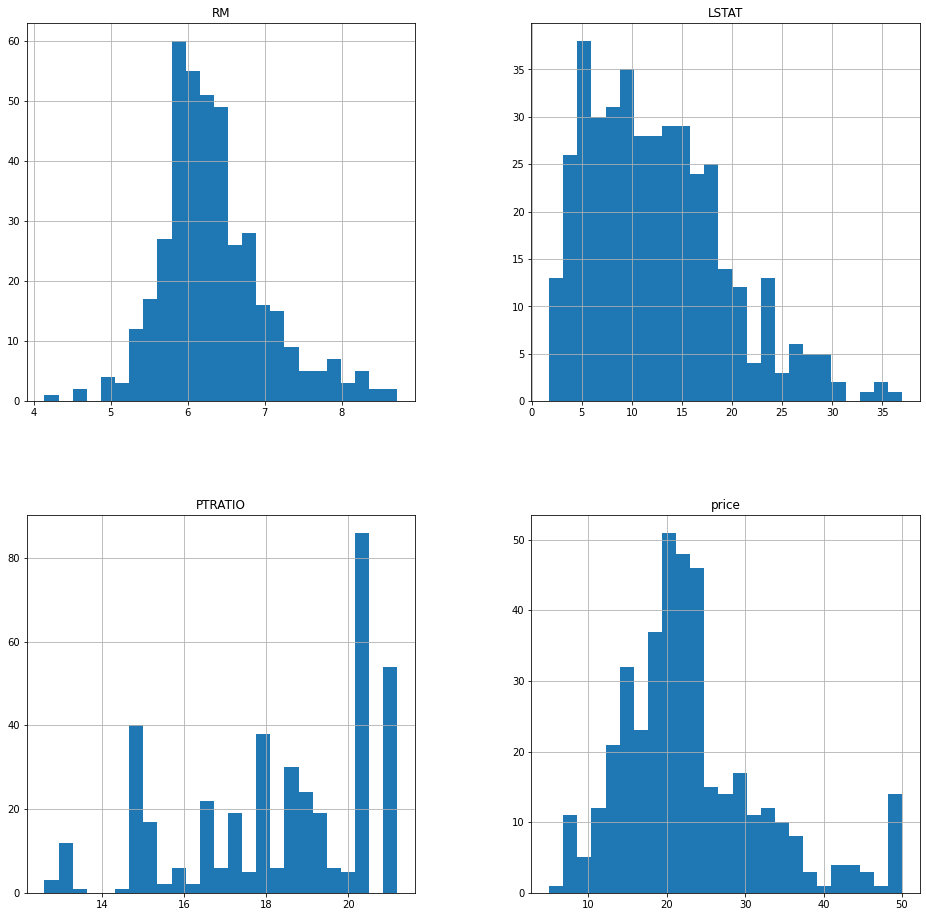

In [ ]:
df.loc[:,:].hist(bins=25,                       
                 figsize=(16,16));

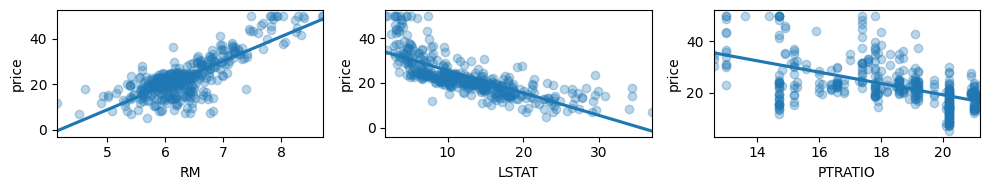

In [ ]:
#still following lesson but wanted the images a bit smaller so i just lowered the dpi value to better fit my screen.

fig, axes = plt.subplots(nrows = 1,ncols = 3,figsize = (10,2), dpi = 100)
sns.regplot(x='RM', y='price', data=df, ci=None, ax = axes[0], scatter_kws={'alpha':0.3});
sns.regplot(x='LSTAT', y='price', data=df, ci=None, ax = axes[1], scatter_kws={'alpha':0.3});
sns.regplot(x='PTRATIO', y='price', data=df, ci=None, ax = axes[2], scatter_kws={'alpha':0.3});
fig.tight_layout()

In [ ]:
#define X and y

X = df.drop(columns= 'price')

In [ ]:
X.shape

(404, 3)

In [ ]:
y = df['price']

In [ ]:
y.shape

(404,)

In [ ]:
#Training Model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#mean of target

y_train.mean()

22.834983498349843

In [ ]:
print('Training MSE:', np.sqrt(mean_squared_error(y_train, [y_train.mean()]*len(y_train))))
print('Testing MSE:', np.sqrt(mean_squared_error(y_test, [y_train.mean()]*len(y_test))))

Training MSE: 9.102342420552077
Testing MSE: 9.199374193472373
